<a href="https://colab.research.google.com/github/mindyjbaker/Final-Project-Python-I590/blob/master/m08_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 8: Histogram and CDF

A deep dive into Histogram and boxplot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd

In [2]:
import matplotlib
matplotlib.__version__

'3.2.2'

## The tricky histogram with pre-counted data

Let's revisit the table from the class

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's try that. 

In [3]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100} 

In [4]:
data.keys()

dict_keys([0.5, 2, 4, 7, 15])

**Q: Draw histogram using this data.** Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

Text(0, 0.5, 'Frequency')

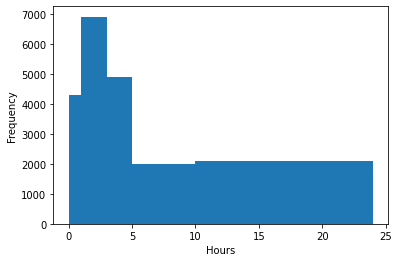

In [13]:
# TODO: draw a histogram with weighted data. 
plt.hist(list(data.keys()), weights=list(data.values()), bins=bins)
plt.xlabel('Hours')
plt.ylabel('Frequency')


As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width (e.g. logarithmic bins). So please be mindful about histograms when you work with variable bins. 

**Q: You can fix this by using the `density` option.**

Text(0, 0.5, 'Frequency')

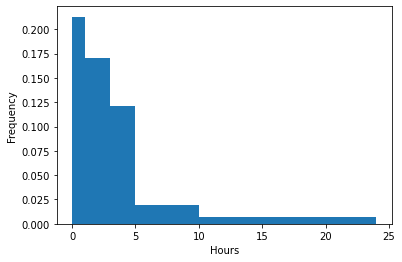

In [14]:
# TODO: fix it with density option. 
plt.hist(list(data.keys()), weights=list(data.values()), bins=bins, density=True)
plt.xlabel('Hours')
plt.ylabel('Frequency')


## Let's use an actual dataset

In [15]:
import vega_datasets

In [16]:
vega_datasets.__version__

'0.9.0'

**Note:** Please check your `vega_datasets` version using `vega_datasets.__version__`. If you have a version lower than `0.9.0`, you will need to check the column names in `movies.head()` and update it accordingly in the code cells below.

In [17]:
movies = vega_datasets.data.movies()
movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


Let's plot the histogram of IMDB ratings. 

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <a list of 10 Patch objects>)

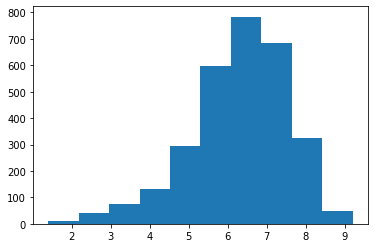

In [19]:
plt.hist(movies['IMDB_Rating'])

Did you get an error or a warning? What's going on? 

The problem is that the column contains `NaN` (Not a Number) values, which represent missing data points. The following command check whether each value is a `NaN` and returns the result. 

In [20]:
movies['IMDB_Rating'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
3196    False
3197     True
3198    False
3199    False
3200    False
Name: IMDB_Rating, Length: 3201, dtype: bool

As you can see there are a bunch of missing rows. You can count them. 

In [21]:
sum(movies['IMDB_Rating'].isna())

213

or drop them. 

In [22]:
IMDB_ratings_nan_dropped = movies['IMDB_Rating'].dropna()
len(IMDB_ratings_nan_dropped)

2988

In [23]:
213 + 2988

3201

The `dropna` can be applied to the dataframe too. 

**Q: drop rows from `movies` dataframe where either `IMDB_Rating` or `IMDB_Votes` is `NaN`.**

In [24]:
len(movies)

3201

In [26]:
# TODO
movies.dropna(subset=['IMDB_Rating','IMDB_Votes'], inplace=True)

In [27]:
# Both should be zero. 
print(sum(movies['IMDB_Rating'].isna()), sum(movies['IMDB_Votes'].isna()))

0 0


How does `matplotlib` decides the bins? Actually `matplotlib`'s `hist` function uses `numpy`'s `histogram` function under the hood. 

**Q: Plot the histogram of movie ratings (`IMDB_Rating`) using the `plt.hist()` function.**

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <a list of 10 Patch objects>)

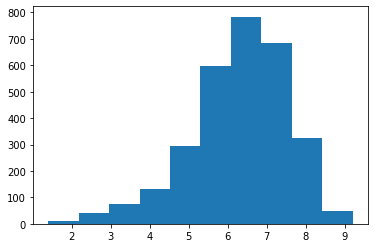

In [28]:
# TODO
plt.hist(movies['IMDB_Rating'])

Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

**The three objects are an array of histogram heights, an array of bin edges, and a list of patch objecs or number of bins.**

[  9.  39.  76. 133. 293. 599. 784. 684. 323.  48.]
[1.4  2.18 2.96 3.74 4.52 5.3  6.08 6.86 7.64 8.42 9.2 ]
<a list of 10 Patch objects>


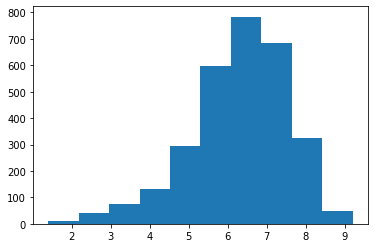

In [33]:
n_raw, bins_raw, patches = plt.hist(movies['IMDB_Rating'])
print(n_raw)
print(bins_raw)
print(patches)

Here, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies. 

**Q: Test whether the sum of values in `n_raw` is equal to the number of movies in the `movies` dataset**

In [36]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies.
if sum(n_raw) == len(movies):
  print(sum(n_raw))
  print(len(movies))
  print('True')
else: 
  print('False')

2988.0
2988
True


The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.4, 2.18\], the second \[2.18, 2.96\], and so on. What's the width of the bins?

In [37]:
np.diff(bins_raw)

array([0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78])

The width is same as the maximum value minus minimum value, divided by 10. 

In [38]:
min_rating = min(movies['IMDB_Rating'])
max_rating = max(movies['IMDB_Rating'])
print(min_rating, max_rating)
print( (max_rating-min_rating) / 10 )

1.4 9.2
0.7799999999999999


Now, let's plot a normalized (density) histogram. 

[0.0038616  0.0167336  0.03260907 0.05706587 0.12571654 0.25701095
 0.33638829 0.29348162 0.13858854 0.0205952 ]
[1.4  2.18 2.96 3.74 4.52 5.3  6.08 6.86 7.64 8.42 9.2 ]


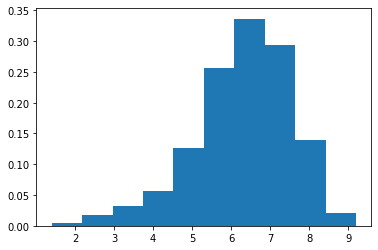

In [39]:
n, bins, patches = plt.hist(movies['IMDB_Rating'], density=True)
print(n)
print(bins)

The ten bins do not change. But now `n` represents the density of the data inside each bin. In other words, the sum of the area of each bar will equal to 1. 

**Q: Can you verify this?**

Hint: the area of each bar is calculated as height * width. You may get something like 0.99999999999999978 instead of 1.

In [65]:
# TODO

sum(np.multiply(np.diff(bins),n))

1.0

Anyway, these data generated from the `hist` function is calculated from `numpy`'s `histogram` function. https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html 

Note that the result of `np.histogram()` is same as that of `plt.hist()`. 

In [66]:
np.histogram(movies['IMDB_Rating'])

(array([  9,  39,  76, 133, 293, 599, 784, 684, 323,  48]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]))

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <a list of 10 Patch objects>)

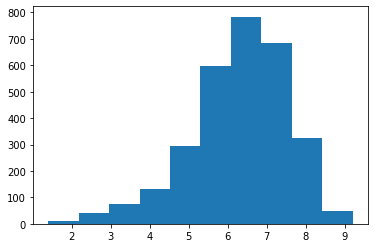

In [67]:
plt.hist(movies['IMDB_Rating'])

If you look at the documentation, you can see that `numpy` uses simply 10 as the default number of bins. But you can set it manually or set it to be `auto`, which is the "Maximum of the `sturges` and `fd` estimators.". Let's try this `auto` option. 

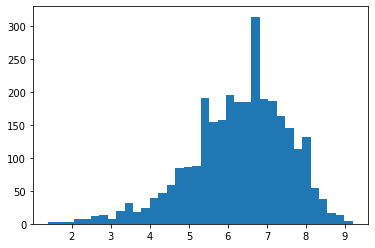

In [68]:
_ = plt.hist(movies['IMDB_Rating'], bins='auto')

## Consequences of the binning parameter

Let's explore the effect of bin size using small multiples. In `matplotlib`, you can use [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8) to put multiple plots into a single figure. 

For instance, you can do something like:

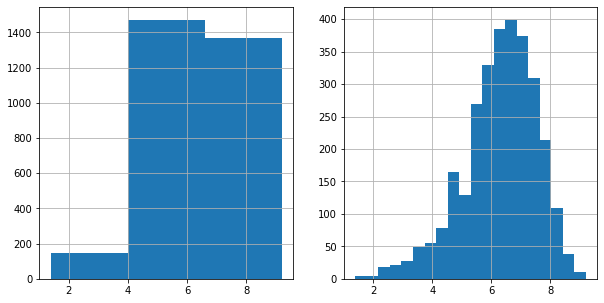

In [107]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movies['IMDB_Rating'].hist(bins=3)
plt.subplot(1,2,2)
movies['IMDB_Rating'].hist(bins=20)

What does the argument in `plt.subplot(1,2,1)` mean? If you're not sure, check out: http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

**Q: create 8 subplots (2 rows and 4 columns) with the following `binsizes`.**

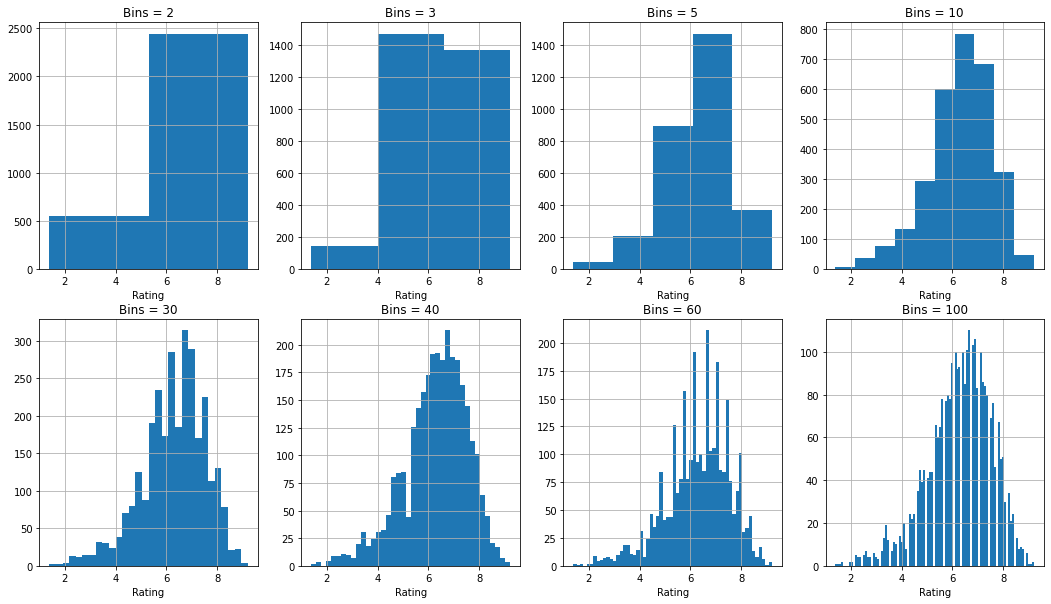

In [151]:
nbins = [2, 3, 5, 10, 30, 40, 60, 100 ]
figsize = (18, 10)

# TODO
fig, axs = plt.subplots(2, 4, figsize=figsize)
 
i=-1
for n in nbins[0:4]:
  i+=1
  axs[0,i].hist(movies['IMDB_Rating'],bins=n)
  axs[0,i].set_title("Bins = "+str(n))
  axs[0,i].set_xlabel("Rating")
  axs[0,i].grid()
i=-1
for n in nbins[4:8]:
  i+=1
  axs[1,i].hist(movies['IMDB_Rating'],bins=n)
  axs[1,i].set_title("Bins = "+str(n))
  axs[1,i].set_xlabel("Rating")
  axs[1,i].grid()

Do you see the issues with having too few bins or too many bins? In particular, do you notice weird patterns that emerge from `bins=30`? 

**Q: Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?**

In [ ]:
# TODO: Provide your answer and evidence here

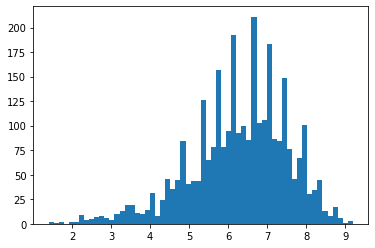

In [156]:
# TODO: Provide your answer and evidence here
plt.hist(movies['IMDB_Rating'],bins=60)
plt.show()

**The IMDB movie ratings range from 1.4 to 9.2 on a scale of 1 to 10.  The ratings are floating point variables with one decimal place. Some of the histograms have bins (empty bars) that have very few or no data points because the scale of the data does not fit well into the bins. For the histogram with 100 bins, some of the bins have zero frequency which leads to the empty bars. The peaks are points where most of the data points lie.**

## Formulae for choosing the number of bins. 

We can manually choose the number of bins based on those formulae. 

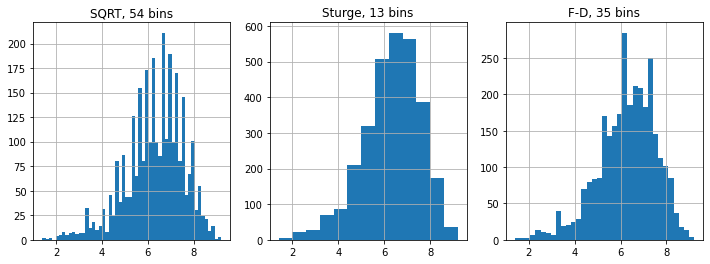

In [164]:
N = len(movies)

plt.figure(figsize=(12,4))

# Sqrt 
nbins = int(np.sqrt(N))

plt.subplot(1,3,1)
plt.title("SQRT, {} bins".format(nbins))
movies['IMDB_Rating'].hist(bins=nbins)

# Sturge's formula
nbins = int(np.ceil(np.log2(N) + 1))

plt.subplot(1,3,2)
plt.title("Sturge, {} bins".format(nbins))
movies['IMDB_Rating'].hist(bins=nbins)

# Freedman-Diaconis
iqr = np.percentile(movies['IMDB_Rating'], 75) - np.percentile(movies['IMDB_Rating'], 25)
width = 2*iqr/np.power(N, 1/3)
nbins = int((max(movies['IMDB_Rating']) - min(movies['IMDB_Rating'])) / width)

plt.subplot(1,3,3)
plt.title("F-D, {} bins".format(nbins))
movies['IMDB_Rating'].hist(bins=nbins)



But we can also use built-in formulae too. Let's try all of them. 

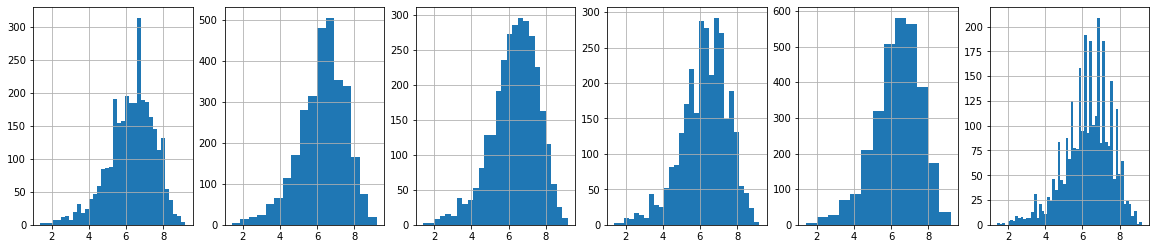

In [165]:
plt.figure(figsize=(20,4))

plt.subplot(161)
movies['IMDB_Rating'].hist(bins='fd')

plt.subplot(162)
movies['IMDB_Rating'].hist(bins='doane')

plt.subplot(163)
movies['IMDB_Rating'].hist(bins='scott')

plt.subplot(164)
movies['IMDB_Rating'].hist(bins='rice')

plt.subplot(165)
movies['IMDB_Rating'].hist(bins='sturges')

plt.subplot(166)
movies['IMDB_Rating'].hist(bins='sqrt')

Some are decent, but several of them tend to overestimate the good number of bins. As you have more data points, some of the formulae may overestimate the necessary number of bins. Particularly in our case, because of the precision issue, we shouldn't increase the number of bins too much.

### Then, how should we choose the number of bins?

So what's the conclusion? use Scott's rule or Sturges' formula? 

No, I think the take-away is that you **should understand how the inappropriate number of bins can mislead you** and you should **try multiple number of bins** to obtain the most accurate picture of the data. Although the 'default' may work in most cases, don't blindly trust it! Don't judge the distribution of a dataset based on a single histogram. Try multiple parameters to get the full picture!

## CDF (Cumulative distribution function)

Drawing a CDF is easy. Because it's very common data visualization, histogram has an option called `cumulative`. 

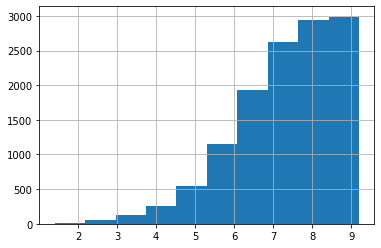

In [166]:
movies['IMDB_Rating'].hist(cumulative=True)

You can also combine with options such as `histtype` and `density`.

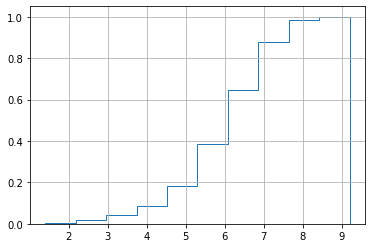

In [167]:
movies['IMDB_Rating'].hist(histtype='step', cumulative=True, density=True)

And increase the number of bins. 

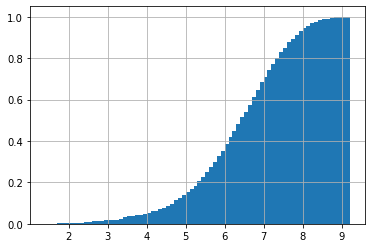

In [168]:
movies['IMDB_Rating'].hist(cumulative=True, density=True, bins=1000)

This method works fine. By increasing the number of bins, you can get a CDF in the resolution that you want. But let's also try it manually to better understand what's going on. First, we should sort all the values. 

In [169]:
rating_sorted = movies['IMDB_Rating'].sort_values()
rating_sorted.head()

1247    1.4
406     1.5
1754    1.6
1590    1.7
1515    1.7
Name: IMDB_Rating, dtype: float64

We need to know the number of data points, 

In [170]:
N = len(rating_sorted)
N

2988

And I think this may be useful for you. 

In [171]:
n = 50
np.linspace(1/n, 1.0, num=n)

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

**Q: now you're ready to draw a proper CDF. Draw the CDF plot of this data.** 

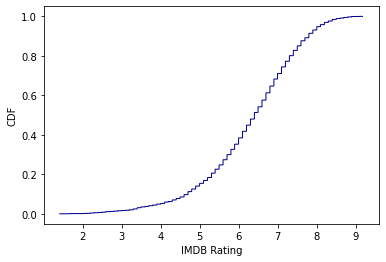

In [200]:
# Implement

movies['IMDB_Rating'].hist(histtype='step', cumulative=True, density=True, bins =1000, color='darkblue')
plt.ylim(-0.05,1.05)
plt.xlabel('IMDB Rating')
plt.ylabel('CDF')
plt.grid(False)
plt.axvline(x = 9.2, color = 'white', linewidth = 2)
plt.show()

## A bit more histogram with altair

As you may remember, you can get a pandas dataframe from `vega_datasets` package and use it to create visualizations. But, if you use `altair`, you can simply pass the URL instead of the actual data. 

In [201]:
vega_datasets.data.movies.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/movies.json'

In [202]:
# Choose based on your environment
#alt.renderers.enable('notebook')
#alt.renderers.enable('jupyterlab')
alt.renderers.enable('default')

RendererRegistry.enable('default')

As mentioned before, in `altair` histogram is not special. It is just a plot that use bars (`mark_bar()`) where X axis is defined by `IMDB_Rating` with bins (`bin=True`), and Y axis is defined by `count()` aggregation function. 

In [203]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=True),
    alt.Y('count()')
)

alt.Chart(...)

Have you noted that it is `IMDB_Rating:Q` not `IMDB_Rating`? This is a shorthand for

In [204]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X('IMDB_Rating', type='quantitative', bin=True),
    alt.Y(aggregate='count', type='quantitative')
)

alt.Chart(...)

In altair, you want to specify the data types using one of the four categories: quantitative, ordinal, nominal, and temporal. https://altair-viz.github.io/user_guide/encoding.html#data-types

Although you can adjust the bins in `altair`, it does not encourage you to set the bins directly. For instance, although there is `step` parameter that directly sets the bin size, there are parameters such as `maxbins` (maximum number of bins) or `minstep` (minimum allowable step size), or `nice` (attemps to make the bin boundaries more human-friendly), that encourage you not to specify the bins directly. 

In [240]:
from altair import Bin

alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(step=0.09)),
    alt.Y('count()')
)

alt.Chart(...)

In [241]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
)

alt.Chart(...)

### Composing charts in altair

`altair` has a very nice way to compose multiple plots. Two histograms side by side? just do the following.

In [242]:
chart1 = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(step=0.1)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart2 = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)

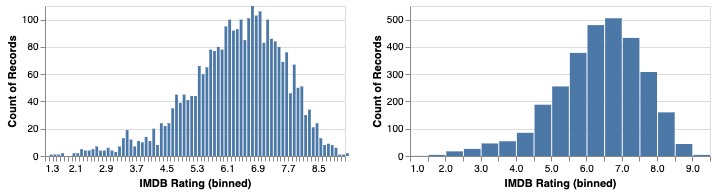

In [ ]:
chart1 | chart2

In [243]:
alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

Vertical commposition? 

In [209]:
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

In [210]:
chart1 & chart2

alt.VConcatChart(...)

Shall we avoid some repetitions? You can define a *base* empty chart first and then assign encodings later when you put together multiple charts together. Here is an example: https://altair-viz.github.io/user_guide/compound_charts.html#repeated-charts



Use base chart to produce the chart above:

In [251]:
base = alt.Chart().mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)

chart = alt.vconcat(data=vega_datasets.data.movies.url)
for bin_param in [Bin(step=0.1), Bin(nice=True, maxbins=20)]:
    row = alt.hconcat()
    row |= base.encode(x=alt.X("IMDB_Rating:Q", bin=bin_param), y='count()')
    chart &= row

chart

alt.VConcatChart(...)

**Q: Using the base chart approach to create a 2x2 chart where the top row shows the two histograms of `IMDB_Rating` with `maxbins`=10 and 50 respectively, and the bottom row shows another two histograms of `IMDB_Votes` with `maxbins`=10 and 50.**

In [298]:
# TODO

movies = vega_datasets.data.movies.url

base = alt.Chart(movies).mark_bar().encode(
alt.Y('count()')).properties(
    width=200,
    height=150
)

chart = alt.vconcat()
for x_encoding in ['IMDB_Rating:Q', 'IMDB_Votes:Q']:
    row = alt.hconcat()
    for maxbins_encoding in [10, 50]:
        row |= base.encode(alt.X(x_encoding, 
        type='quantitative',
        bin=Bin(maxbins=maxbins_encoding)))
    chart &= row
chart

alt.VConcatChart(...)